Dictionary Learning
===================

This example demonstrates the use of class [bpdndl.BPDNDictLearn](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.bpdndl.html#sporco.dictlrn.bpdndl.BPDNDictLearn) for learning a dictionary (standard, not convolutional) from a set of training images.

In [1]:
from __future__ import division, print_function
from builtins import input

import numpy as np

from sporco.dictlrn import bpdndl
from sporco import util
from sporco import array
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])

Extract all 8x8 image blocks, reshape, and subtract block means.

In [3]:
S = array.extract_blocks((S1, S2, S3, S4, S5), (8, 8))
S = np.reshape(S, (np.prod(S.shape[0:2]), S.shape[2]))
S -= np.mean(S, axis=0)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(S.shape[0], 128)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.1
opt = bpdndl.BPDNDictLearn.Options({'Verbose': True, 'MaxMainIter': 100,
                      'BPDN': {'rho': 10.0*lmbda + 0.1},
                      'CMOD': {'rho': S.shape[1] / 1e3}})

Create solver object and solve.

In [6]:
d = bpdndl.BPDNDictLearn(D0, S, lmbda, opt)
d.solve()
print("BPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D     
--------------------------------------------------------------------------------------------------------


   0  2.89e+04  2.00e+04  8.85e+04  4.46e+00  6.01e-01  6.06e-01  1.10e+00  3.07e-01  5.71e-01  7.32e+01


   1  2.03e+04  6.75e+03  1.35e+05  2.79e-01  3.45e-01  4.31e-01  1.10e+00  2.84e-02  1.59e-01  7.32e+01


   2  1.91e+04  6.44e+03  1.27e+05  4.85e-01  2.13e-01  2.20e-01  1.10e+00  4.22e-02  8.63e-02  7.32e+01


   3  1.86e+04  6.64e+03  1.19e+05  5.38e-01  1.54e-01  1.53e-01  1.10e+00  4.66e-02  7.08e-02  7.32e+01


   4  1.82e+04  6.39e+03  1.18e+05  3.55e-01  1.15e-01  1.17e-01  1.10e+00  3.19e-02  6.00e-02  7.32e+01


   5  1.80e+04  6.38e+03  1.16e+05  3.10e-01  9.63e-02  1.03e-01  1.10e+00  2.85e-02  5.55e-02  7.32e+01


   6  1.78e+04  6.36e+03  1.14e+05  2.79e-01  8.15e-02  9.59e-02  1.10e+00  2.61e-02  5.23e-02  7.32e+01


   7  1.76e+04  6.32e+03  1.13e+05  2.51e-01  7.35e-02  9.15e-02  1.10e+00  2.38e-02  4.99e-02  7.32e+01


   8  1.75e+04  6.27e+03  1.12e+05  2.25e-01  6.62e-02  8.84e-02  1.10e+00  2.17e-02  4.78e-02  7.32e+01


   9  1.74e+04  6.22e+03  1.11e+05  2.07e-01  6.19e-02  8.58e-02  1.10e+00  2.01e-02  4.58e-02  7.32e+01


  10  1.72e+04  6.17e+03  1.11e+05  1.89e-01  5.77e-02  8.33e-02  1.10e+00  1.85e-02  4.38e-02  7.32e+01


  11  1.71e+04  6.12e+03  1.10e+05  1.73e-01  5.48e-02  8.09e-02  1.10e+00  1.71e-02  4.19e-02  7.32e+01


  12  1.70e+04  6.06e+03  1.09e+05  1.58e-01  5.18e-02  7.85e-02  1.10e+00  1.57e-02  4.02e-02  7.32e+01


  13  1.69e+04  6.01e+03  1.09e+05  1.44e-01  4.95e-02  7.61e-02  1.10e+00  1.45e-02  3.84e-02  7.32e+01


  14  1.68e+04  5.96e+03  1.09e+05  1.32e-01  4.72e-02  7.36e-02  1.10e+00  1.33e-02  3.68e-02  7.32e+01


  15  1.67e+04  5.91e+03  1.08e+05  1.22e-01  4.52e-02  7.12e-02  1.10e+00  1.23e-02  3.53e-02  7.32e+01


  16  1.66e+04  5.86e+03  1.08e+05  1.12e-01  4.32e-02  6.88e-02  1.10e+00  1.14e-02  3.38e-02  7.32e+01


  17  1.66e+04  5.81e+03  1.08e+05  1.03e-01  4.14e-02  6.64e-02  1.10e+00  1.06e-02  3.24e-02  7.32e+01


  18  1.65e+04  5.77e+03  1.07e+05  9.45e-02  3.96e-02  6.41e-02  1.10e+00  9.77e-03  3.10e-02  7.32e+01


  19  1.65e+04  5.72e+03  1.07e+05  8.70e-02  3.79e-02  6.18e-02  1.10e+00  9.07e-03  2.96e-02  7.32e+01


  20  1.64e+04  5.68e+03  1.07e+05  8.00e-02  3.62e-02  5.94e-02  1.10e+00  8.41e-03  2.83e-02  7.32e+01


  21  1.63e+04  5.64e+03  1.07e+05  7.37e-02  3.46e-02  5.70e-02  1.10e+00  7.82e-03  2.70e-02  7.32e+01


  22  1.63e+04  5.61e+03  1.07e+05  6.75e-02  3.30e-02  5.48e-02  1.10e+00  7.25e-03  2.57e-02  7.32e+01


  23  1.63e+04  5.57e+03  1.07e+05  6.25e-02  3.15e-02  5.26e-02  1.10e+00  6.77e-03  2.45e-02  7.32e+01


  24  1.62e+04  5.54e+03  1.07e+05  5.83e-02  3.01e-02  5.05e-02  1.10e+00  6.37e-03  2.34e-02  7.32e+01


  25  1.62e+04  5.52e+03  1.07e+05  5.46e-02  2.87e-02  4.85e-02  1.10e+00  6.00e-03  2.22e-02  7.32e+01


  26  1.61e+04  5.49e+03  1.07e+05  5.19e-02  2.75e-02  4.66e-02  1.10e+00  5.71e-03  2.11e-02  7.32e+01


  27  1.61e+04  5.47e+03  1.06e+05  5.01e-02  2.63e-02  4.48e-02  1.10e+00  5.50e-03  2.01e-02  7.32e+01


  28  1.61e+04  5.45e+03  1.06e+05  4.88e-02  2.51e-02  4.31e-02  1.10e+00  5.32e-03  1.91e-02  7.32e+01


  29  1.61e+04  5.43e+03  1.06e+05  4.74e-02  2.40e-02  4.14e-02  1.10e+00  5.14e-03  1.81e-02  7.32e+01


  30  1.60e+04  5.42e+03  1.06e+05  4.66e-02  2.29e-02  3.98e-02  1.10e+00  5.00e-03  1.71e-02  7.32e+01


  31  1.60e+04  5.40e+03  1.06e+05  4.59e-02  2.19e-02  3.82e-02  1.10e+00  4.88e-03  1.62e-02  7.32e+01


  32  1.60e+04  5.39e+03  1.06e+05  4.52e-02  2.09e-02  3.66e-02  1.10e+00  4.78e-03  1.53e-02  7.32e+01


  33  1.60e+04  5.37e+03  1.06e+05  4.45e-02  1.99e-02  3.50e-02  1.10e+00  4.67e-03  1.45e-02  7.32e+01


  34  1.60e+04  5.36e+03  1.06e+05  4.37e-02  1.89e-02  3.36e-02  1.10e+00  4.56e-03  1.37e-02  7.32e+01


  35  1.59e+04  5.35e+03  1.06e+05  4.29e-02  1.81e-02  3.22e-02  1.10e+00  4.45e-03  1.31e-02  7.32e+01


  36  1.59e+04  5.34e+03  1.06e+05  4.19e-02  1.73e-02  3.10e-02  1.10e+00  4.34e-03  1.26e-02  7.32e+01


  37  1.59e+04  5.33e+03  1.06e+05  4.11e-02  1.66e-02  2.98e-02  1.10e+00  4.23e-03  1.21e-02  7.32e+01


  38  1.59e+04  5.32e+03  1.06e+05  4.02e-02  1.60e-02  2.88e-02  1.10e+00  4.13e-03  1.17e-02  7.32e+01


  39  1.59e+04  5.31e+03  1.06e+05  3.96e-02  1.54e-02  2.78e-02  1.10e+00  4.05e-03  1.13e-02  7.32e+01


  40  1.59e+04  5.31e+03  1.06e+05  3.89e-02  1.48e-02  2.69e-02  1.10e+00  3.96e-03  1.09e-02  7.32e+01


  41  1.59e+04  5.30e+03  1.06e+05  3.81e-02  1.43e-02  2.60e-02  1.10e+00  3.86e-03  1.05e-02  7.32e+01


  42  1.59e+04  5.29e+03  1.06e+05  3.73e-02  1.38e-02  2.52e-02  1.10e+00  3.76e-03  1.01e-02  7.32e+01


  43  1.59e+04  5.29e+03  1.06e+05  3.63e-02  1.34e-02  2.44e-02  1.10e+00  3.66e-03  9.75e-03  7.32e+01


  44  1.59e+04  5.28e+03  1.06e+05  3.54e-02  1.29e-02  2.36e-02  1.10e+00  3.55e-03  9.40e-03  7.32e+01


  45  1.58e+04  5.28e+03  1.06e+05  3.44e-02  1.25e-02  2.29e-02  1.10e+00  3.45e-03  9.08e-03  7.32e+01


  46  1.58e+04  5.27e+03  1.06e+05  3.34e-02  1.21e-02  2.22e-02  1.10e+00  3.35e-03  8.77e-03  7.32e+01


  47  1.58e+04  5.27e+03  1.06e+05  3.24e-02  1.17e-02  2.15e-02  1.10e+00  3.24e-03  8.48e-03  7.32e+01


  48  1.58e+04  5.26e+03  1.06e+05  3.14e-02  1.13e-02  2.09e-02  1.10e+00  3.15e-03  8.20e-03  7.32e+01


  49  1.58e+04  5.26e+03  1.06e+05  3.05e-02  1.09e-02  2.03e-02  1.10e+00  3.06e-03  7.95e-03  7.32e+01


  50  1.58e+04  5.25e+03  1.06e+05  2.96e-02  1.06e-02  1.98e-02  1.10e+00  2.97e-03  7.71e-03  7.32e+01


  51  1.58e+04  5.25e+03  1.06e+05  2.87e-02  1.03e-02  1.92e-02  1.10e+00  2.88e-03  7.48e-03  7.32e+01


  52  1.58e+04  5.25e+03  1.06e+05  2.78e-02  1.00e-02  1.87e-02  1.10e+00  2.79e-03  7.27e-03  7.32e+01


  53  1.58e+04  5.24e+03  1.06e+05  2.69e-02  9.72e-03  1.82e-02  1.10e+00  2.70e-03  7.07e-03  7.32e+01


  54  1.58e+04  5.24e+03  1.06e+05  2.60e-02  9.46e-03  1.78e-02  1.10e+00  2.62e-03  6.89e-03  7.32e+01


  55  1.58e+04  5.24e+03  1.06e+05  2.52e-02  9.22e-03  1.74e-02  1.10e+00  2.54e-03  6.72e-03  7.32e+01


  56  1.58e+04  5.23e+03  1.06e+05  2.44e-02  8.99e-03  1.69e-02  1.10e+00  2.47e-03  6.56e-03  7.32e+01


  57  1.58e+04  5.23e+03  1.06e+05  2.36e-02  8.78e-03  1.66e-02  1.10e+00  2.39e-03  6.41e-03  7.32e+01


  58  1.58e+04  5.23e+03  1.06e+05  2.29e-02  8.58e-03  1.62e-02  1.10e+00  2.32e-03  6.26e-03  7.32e+01


  59  1.58e+04  5.23e+03  1.06e+05  2.22e-02  8.39e-03  1.59e-02  1.10e+00  2.26e-03  6.13e-03  7.32e+01


  60  1.58e+04  5.22e+03  1.06e+05  2.16e-02  8.21e-03  1.56e-02  1.10e+00  2.20e-03  6.00e-03  7.32e+01


  61  1.58e+04  5.22e+03  1.06e+05  2.10e-02  8.05e-03  1.53e-02  1.10e+00  2.15e-03  5.89e-03  7.32e+01


  62  1.58e+04  5.22e+03  1.05e+05  2.04e-02  7.90e-03  1.51e-02  1.10e+00  2.09e-03  5.79e-03  7.32e+01


  63  1.58e+04  5.22e+03  1.05e+05  1.98e-02  7.76e-03  1.48e-02  1.10e+00  2.04e-03  5.68e-03  7.32e+01


  64  1.58e+04  5.21e+03  1.05e+05  1.93e-02  7.62e-03  1.46e-02  1.10e+00  1.99e-03  5.58e-03  7.32e+01


  65  1.58e+04  5.21e+03  1.05e+05  1.88e-02  7.49e-03  1.43e-02  1.10e+00  1.95e-03  5.49e-03  7.32e+01


  66  1.58e+04  5.21e+03  1.05e+05  1.82e-02  7.37e-03  1.41e-02  1.10e+00  1.90e-03  5.40e-03  7.32e+01


  67  1.58e+04  5.21e+03  1.05e+05  1.78e-02  7.25e-03  1.39e-02  1.10e+00  1.86e-03  5.31e-03  7.32e+01


  68  1.58e+04  5.21e+03  1.05e+05  1.73e-02  7.14e-03  1.37e-02  1.10e+00  1.82e-03  5.23e-03  7.32e+01


  69  1.57e+04  5.21e+03  1.05e+05  1.69e-02  7.03e-03  1.35e-02  1.10e+00  1.78e-03  5.14e-03  7.32e+01


  70  1.57e+04  5.20e+03  1.05e+05  1.65e-02  6.93e-03  1.33e-02  1.10e+00  1.75e-03  5.06e-03  7.32e+01


  71  1.57e+04  5.20e+03  1.05e+05  1.61e-02  6.83e-03  1.31e-02  1.10e+00  1.71e-03  4.99e-03  7.32e+01


  72  1.57e+04  5.20e+03  1.05e+05  1.58e-02  6.73e-03  1.30e-02  1.10e+00  1.68e-03  4.92e-03  7.32e+01


  73  1.57e+04  5.20e+03  1.05e+05  1.54e-02  6.64e-03  1.28e-02  1.10e+00  1.65e-03  4.85e-03  7.32e+01


  74  1.57e+04  5.20e+03  1.05e+05  1.51e-02  6.56e-03  1.27e-02  1.10e+00  1.62e-03  4.79e-03  7.32e+01


  75  1.57e+04  5.20e+03  1.05e+05  1.48e-02  6.48e-03  1.25e-02  1.10e+00  1.60e-03  4.73e-03  7.32e+01


  76  1.57e+04  5.20e+03  1.05e+05  1.45e-02  6.40e-03  1.24e-02  1.10e+00  1.58e-03  4.67e-03  7.32e+01


  77  1.57e+04  5.19e+03  1.05e+05  1.43e-02  6.33e-03  1.22e-02  1.10e+00  1.55e-03  4.61e-03  7.32e+01


  78  1.57e+04  5.19e+03  1.05e+05  1.40e-02  6.26e-03  1.21e-02  1.10e+00  1.53e-03  4.56e-03  7.32e+01


  79  1.57e+04  5.19e+03  1.05e+05  1.38e-02  6.19e-03  1.20e-02  1.10e+00  1.51e-03  4.51e-03  7.32e+01


  80  1.57e+04  5.19e+03  1.05e+05  1.36e-02  6.12e-03  1.18e-02  1.10e+00  1.49e-03  4.46e-03  7.32e+01


  81  1.57e+04  5.19e+03  1.05e+05  1.34e-02  6.05e-03  1.17e-02  1.10e+00  1.47e-03  4.41e-03  7.32e+01


  82  1.57e+04  5.19e+03  1.05e+05  1.32e-02  5.99e-03  1.16e-02  1.10e+00  1.46e-03  4.37e-03  7.32e+01


  83  1.57e+04  5.19e+03  1.05e+05  1.30e-02  5.93e-03  1.15e-02  1.10e+00  1.44e-03  4.33e-03  7.32e+01


  84  1.57e+04  5.18e+03  1.05e+05  1.29e-02  5.87e-03  1.14e-02  1.10e+00  1.43e-03  4.29e-03  7.32e+01


  85  1.57e+04  5.18e+03  1.05e+05  1.27e-02  5.82e-03  1.13e-02  1.10e+00  1.41e-03  4.26e-03  7.32e+01


  86  1.57e+04  5.18e+03  1.05e+05  1.26e-02  5.77e-03  1.12e-02  1.10e+00  1.40e-03  4.23e-03  7.32e+01


  87  1.57e+04  5.18e+03  1.05e+05  1.24e-02  5.71e-03  1.11e-02  1.10e+00  1.39e-03  4.19e-03  7.32e+01


  88  1.57e+04  5.18e+03  1.05e+05  1.23e-02  5.66e-03  1.10e-02  1.10e+00  1.37e-03  4.16e-03  7.32e+01


  89  1.57e+04  5.18e+03  1.05e+05  1.22e-02  5.61e-03  1.09e-02  1.10e+00  1.36e-03  4.13e-03  7.32e+01


  90  1.57e+04  5.18e+03  1.05e+05  1.21e-02  5.57e-03  1.08e-02  1.10e+00  1.35e-03  4.09e-03  7.32e+01


  91  1.57e+04  5.18e+03  1.05e+05  1.19e-02  5.52e-03  1.07e-02  1.10e+00  1.34e-03  4.06e-03  7.32e+01


  92  1.57e+04  5.18e+03  1.05e+05  1.18e-02  5.47e-03  1.06e-02  1.10e+00  1.33e-03  4.03e-03  7.32e+01


  93  1.57e+04  5.17e+03  1.05e+05  1.17e-02  5.42e-03  1.05e-02  1.10e+00  1.31e-03  4.00e-03  7.32e+01


  94  1.57e+04  5.17e+03  1.05e+05  1.15e-02  5.37e-03  1.05e-02  1.10e+00  1.30e-03  3.98e-03  7.32e+01


  95  1.57e+04  5.17e+03  1.05e+05  1.14e-02  5.33e-03  1.04e-02  1.10e+00  1.29e-03  3.95e-03  7.32e+01


  96  1.57e+04  5.17e+03  1.05e+05  1.13e-02  5.28e-03  1.03e-02  1.10e+00  1.28e-03  3.92e-03  7.32e+01


  97  1.57e+04  5.17e+03  1.05e+05  1.11e-02  5.24e-03  1.02e-02  1.10e+00  1.26e-03  3.89e-03  7.32e+01


  98  1.57e+04  5.17e+03  1.05e+05  1.10e-02  5.19e-03  1.01e-02  1.10e+00  1.25e-03  3.86e-03  7.32e+01


  99  1.57e+04  5.17e+03  1.05e+05  1.08e-02  5.14e-03  1.00e-02  1.10e+00  1.23e-03  3.83e-03  7.32e+01
--------------------------------------------------------------------------------------------------------
BPDNDictLearn solve time: 44.22s


Display initial and final dictionaries.

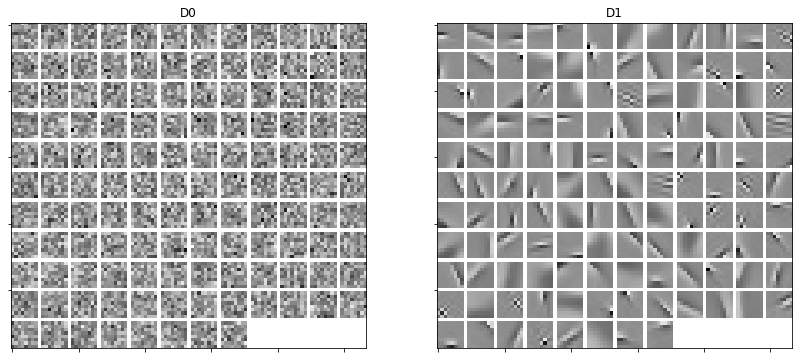

In [7]:
D1 = d.getdict().reshape((8, 8, D0.shape[1]))
D0 = D0.reshape(8, 8, D0.shape[-1])
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

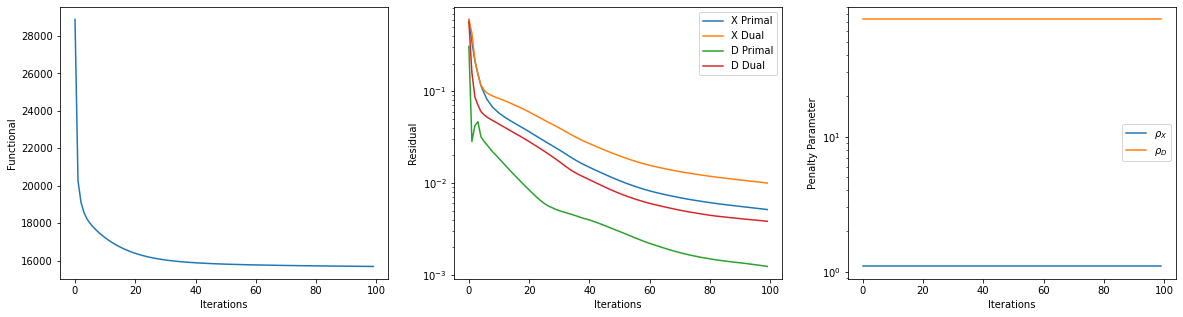

In [8]:
its = d.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.XPrRsdl, its.XDlRsdl, its.DPrRsdl,
          its.DDlRsdl)).T, ptyp='semilogy', xlbl='Iterations',
          ylbl='Residual', lgnd=['X Primal', 'X Dual', 'D Primal', 'D Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(np.vstack((its.XRho, its.DRho)).T, xlbl='Iterations',
          ylbl='Penalty Parameter', ptyp='semilogy',
          lgnd=['$\\rho_X$', '$\\rho_D$'], fig=fig)
fig.show()